In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 


In [2]:
image_size = 256
batch_size = 32

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\Dilan\\Desktop\\potato project\\PlantVillage",
    shuffle = True,
    image_size = (image_size,image_size),
    batch_size = batch_size
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names 

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

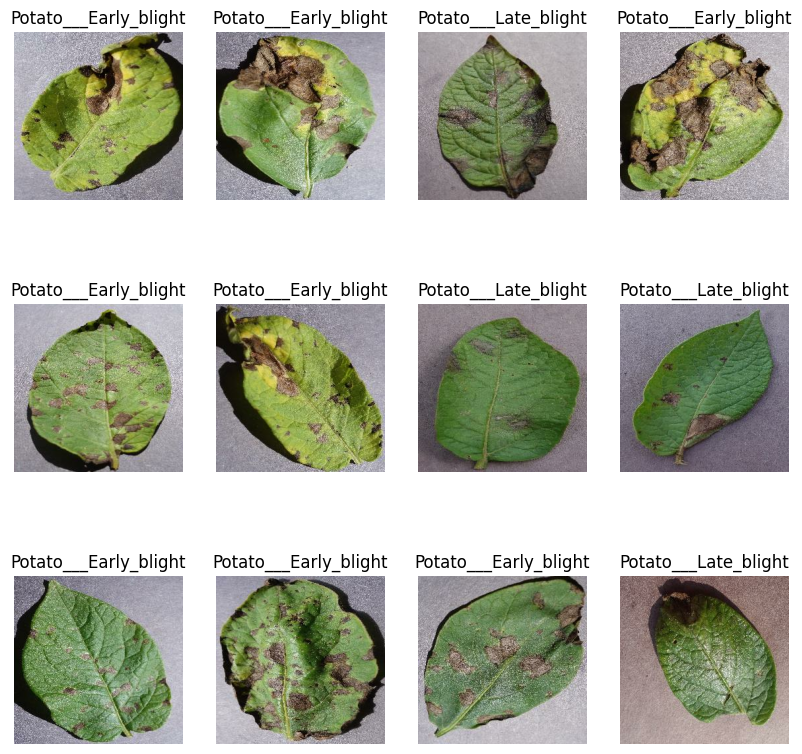

In [12]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
   for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')